In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from scipy import stats
from numpy import arange,array,ones
from scipy import stats

api = 'a4fefc3473fc58d5e520f4cdcfbbaa67'

In [9]:
#Opening Files
file = '../Suicide_Rates/master.csv'
country_data = 'country-capitals.csv'
df = pd.read_csv(file)
#This file has Country-Capital information
country_data_df = pd.read_csv(country_data)

In [10]:
#Dropping unneeded columns
clean_country_data = country_data_df.loc[:,['CountryName','CapitalName','CapitalLatitude','CapitalLongitude']]

In [11]:
#Group by Country
df_by_country = df.groupby('country').mean()
#df_by_country.sort_values('suicides/100k pop')
df_by_country = df_by_country.reset_index()
df_by_country

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Albania,1999.227273,7.462121,2.360813e+05,3.502879,0.673000,1859.045455
1,Antigua and Barbuda,1999.481481,0.033951,6.142679e+03,0.552901,0.781667,10448.185185
2,Argentina,2000.000000,221.018817,2.784907e+06,10.469328,0.779600,7914.096774
3,Armenia,2002.791946,6.392617,2.595576e+05,3.275872,0.690125,1873.919463
4,Aruba,2004.285714,0.601190,7.498077e+03,9.503095,NaN,24221.642857
5,Australia,1999.833333,194.752778,1.506605e+06,12.992806,0.912750,32776.400000
6,Austria,2000.418848,131.081152,6.383589e+05,23.759764,0.847500,34261.780105
7,Azerbaijan,1997.625000,8.625000,5.822411e+05,1.855417,0.624500,1005.125000
8,Bahamas,2001.521739,0.336957,2.375742e+04,1.247391,0.779833,25836.391304
9,Bahrain,2002.809524,1.837302,6.648383e+04,1.854127,0.804625,18039.523810


In [12]:
#Adding capital info to Suicide data
df_country_and_capital = pd.merge(df_by_country, country_data_df, on=None, left_on= 'country', right_on = 'CountryName')

In [13]:
#Cleaning
df_country_and_capital.drop(['CountryName', 'ContinentName'], axis=1)

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),CapitalName,CapitalLatitude,CapitalLongitude,CountryCode
0,Albania,1999.227273,7.462121,2.360813e+05,3.502879,0.673000,1859.045455,Tirana,41.316667,19.816667,AL
1,Antigua and Barbuda,1999.481481,0.033951,6.142679e+03,0.552901,0.781667,10448.185185,Saint John's,17.116667,-61.850000,AG
2,Argentina,2000.000000,221.018817,2.784907e+06,10.469328,0.779600,7914.096774,Buenos Aires,-34.583333,-58.666667,AR
3,Armenia,2002.791946,6.392617,2.595576e+05,3.275872,0.690125,1873.919463,Yerevan,40.166667,44.500000,AM
4,Aruba,2004.285714,0.601190,7.498077e+03,9.503095,NaN,24221.642857,Oranjestad,12.516667,-70.033333,AW
5,Australia,1999.833333,194.752778,1.506605e+06,12.992806,0.912750,32776.400000,Canberra,-35.266667,149.133333,AU
6,Austria,2000.418848,131.081152,6.383589e+05,23.759764,0.847500,34261.780105,Vienna,48.200000,16.366667,AT
7,Azerbaijan,1997.625000,8.625000,5.822411e+05,1.855417,0.624500,1005.125000,Baku,40.383333,49.866667,AZ
8,Bahamas,2001.521739,0.336957,2.375742e+04,1.247391,0.779833,25836.391304,Nassau,25.083333,-77.350000,BS
9,Bahrain,2002.809524,1.837302,6.648383e+04,1.854127,0.804625,18039.523810,Manama,26.233333,50.566667,BH


In [14]:
#List of Capitals from Suicide data, for API call
capital_list = df_country_and_capital.iloc[:,8]
print(list(capital_list))

['Tirana', "Saint John's", 'Buenos Aires', 'Yerevan', 'Oranjestad', 'Canberra', 'Vienna', 'Baku', 'Nassau', 'Manama', 'Bridgetown', 'Minsk', 'Brussels', 'Belmopan', 'Sarajevo', 'Brasilia', 'Sofia', 'Ottawa', 'Santiago', 'Bogota', 'San Jose', 'Zagreb', 'Havana', 'Nicosia', 'Prague', 'Copenhagen', 'Roseau', 'Quito', 'San Salvador', 'Tallinn', 'Suva', 'Helsinki', 'Paris', 'Tbilisi', 'Berlin', 'Athens', "Saint George's", 'Guatemala City', 'Georgetown', 'Budapest', 'Reykjavik', 'Dublin', 'Jerusalem', 'Rome', 'Kingston', 'Tokyo', 'Astana', 'Tarawa', 'Kuwait City', 'Bishkek', 'Riga', 'Vilnius', 'Luxembourg', nan, 'Male', 'Valletta', 'Port Louis', 'Mexico City', 'Ulaanbaatar', 'Podgorica', 'Amsterdam', 'Wellington', 'Managua', 'Oslo', 'Muscat', 'Panama City', 'Asuncion', 'Manila', 'Warsaw', 'Lisbon', 'San Juan', 'Doha', 'Bucharest', 'Basseterre', 'Castries', 'San Marino', 'Belgrade', 'Victoria', 'Singapore', 'Bratislava', 'Ljubljana', 'Pretoria', 'Madrid', 'Colombo', 'Paramaribo', 'Stockholm',

In [15]:
#API call
capital_weather = []
for capital in capital_list:    
    response = requests.get('http://api.openweathermap.org/data/2.5/weather?q='+str(capital)+'&main.temp=Imperial&APPID=a4fefc3473fc58d5e520f4cdcfbbaa67')
    data = response.json()
    capital_weather.append(data)

In [16]:
capital_weather

[{'coord': {'lon': 19.82, 'lat': 41.33},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 300.15,
   'pressure': 1021,
   'humidity': 57,
   'temp_min': 300.15,
   'temp_max': 300.15},
  'visibility': 10000,
  'wind': {'speed': 2.1, 'deg': 350},
  'clouds': {'all': 75},
  'dt': 1568305048,
  'sys': {'type': 1,
   'id': 6359,
   'message': 0.0074,
   'country': 'AL',
   'sunrise': 1568261861,
   'sunset': 1568307418},
  'timezone': 7200,
  'id': 3183875,
  'name': 'Tirana',
  'cod': 200},
 {'cod': '404', 'message': 'city not found'},
 {'coord': {'lon': -58.44, 'lat': -34.61},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 287.6,
   'pressure': 1022,
   'humidity': 47,
   'temp_min': 285.15,
   'temp_max': 290.37},
  'visibility': 10000,
  'wind': {'speed': 2.6, 'deg': 230},
  'clouds': {'all': 0},
 

In [18]:
#Putting relevant information into list
capital_temps = []
capital_max_temps = []
for capital in capital_weather:
    try:
        capital_temps.append(capital['main']['temp'])
        capital_max_temps.append(capital['main']['temp_max'])
    except:
        capital_temps.append('NO CAPITAL FOUND')
        
    

In [91]:
country_by_temp

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName,0
0,Albania,1999.227273,7.462121,2.360813e+05,3.502879,0.673000,1859.045455,Albania,Tirana,41.316667,19.816667,AL,Europe,300.15
1,Antigua and Barbuda,1999.481481,0.033951,6.142679e+03,0.552901,0.781667,10448.185185,Antigua and Barbuda,Saint John's,17.116667,-61.850000,AG,North America,NO CAPITAL FOUND
2,Argentina,2000.000000,221.018817,2.784907e+06,10.469328,0.779600,7914.096774,Argentina,Buenos Aires,-34.583333,-58.666667,AR,South America,287.6
3,Armenia,2002.791946,6.392617,2.595576e+05,3.275872,0.690125,1873.919463,Armenia,Yerevan,40.166667,44.500000,AM,Europe,292.15
4,Aruba,2004.285714,0.601190,7.498077e+03,9.503095,NaN,24221.642857,Aruba,Oranjestad,12.516667,-70.033333,AW,North America,305.15
5,Australia,1999.833333,194.752778,1.506605e+06,12.992806,0.912750,32776.400000,Australia,Canberra,-35.266667,149.133333,AU,Australia,276.52
6,Austria,2000.418848,131.081152,6.383589e+05,23.759764,0.847500,34261.780105,Austria,Vienna,48.200000,16.366667,AT,Europe,294.66
7,Azerbaijan,1997.625000,8.625000,5.822411e+05,1.855417,0.624500,1005.125000,Azerbaijan,Baku,40.383333,49.866667,AZ,Europe,294.15
8,Bahamas,2001.521739,0.336957,2.375742e+04,1.247391,0.779833,25836.391304,Bahamas,Nassau,25.083333,-77.350000,BS,North America,295.98
9,Bahrain,2002.809524,1.837302,6.648383e+04,1.854127,0.804625,18039.523810,Bahrain,Manama,26.233333,50.566667,BH,Asia,307.17


In [20]:
#Merging capital weather info back into suicide data
capital_temps = pd.DataFrame(capital_temps)
country_by_temp = pd.merge(df_country_and_capital, capital_temps,left_index=True, right_index=True)

In [21]:
#Dropping capitals without weather info
dropped = country_by_temp.drop([1,23,94])

In [22]:
dropped

,country,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName,0
0,Albania,1999.227273,7.462121,2.360813e+05,3.502879,0.673000,1859.045455,Albania,Tirana,41.316667,19.816667,AL,Europe,300.15
2,Argentina,2000.000000,221.018817,2.784907e+06,10.469328,0.779600,7914.096774,Argentina,Buenos Aires,-34.583333,-58.666667,AR,South America,287.6
3,Armenia,2002.791946,6.392617,2.595576e+05,3.275872,0.690125,1873.919463,Armenia,Yerevan,40.166667,44.500000,AM,Europe,292.15
4,Aruba,2004.285714,0.601190,7.498077e+03,9.503095,NaN,24221.642857,Aruba,Oranjestad,12.516667,-70.033333,AW,North America,305.15
5,Australia,1999.833333,194.752778,1.506605e+06,12.992806,0.912750,32776.400000,Australia,Canberra,-35.266667,149.133333,AU,Australia,276.52
6,Austria,2000.418848,131.081152,6.383589e+05,23.759764,0.847500,34261.780105,Austria,Vienna,48.200000,16.366667,AT,Europe,294.66
7,Azerbaijan,1997.625000,8.625000,5.822411e+05,1.855417,0.624500,1005.125000,Azerbaijan,Baku,40.383333,49.866667,AZ,Europe,294.15
8,Bahamas,2001.521739,0.336957,2.375742e+04,1.247391,0.779833,25836.391304,Bahamas,Nassau,25.083333,-77.350000,BS,North America,295.98
9,Bahrain,2002.809524,1.837302,6.648383e+04,1.854127,0.804625,18039.523810,Bahrain,Manama,26.233333,50.566667,BH,Asia,307.17
10,Barbados,1999.240000,0.590000,2.071230e+04,2.970433,0.756556,12251.000000,Barbados,Bridgetown,13.100000,-59.616667,BB,North America,285.91


In [92]:
#Drawing colors
colors = []
for item in c:
    if item == 'Europe':
        colors.append('red')
    elif item == 'South America':
        colors.append('blue')
    elif item == 'North America':
        colors.append('green')
    elif item == 'Australia':
        colors.append('orange')
    elif item == 'Asia':
        colors.append('purple')
    elif item == 'Central America':
        colors.append('green')
    elif item == 'Africa':
        colors.append('brown')

In [112]:
#Regression Line
cap_temp = [int(x)for x in cap_temp]
suicide_rate = [int(x)for x in suicide_rate]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(suicide_rate
 ,cap_temp)

vc_fit = int(vc_slope) * cap_temp + vc_int

<class 'numpy.float64'>


In [122]:
vc_fit

array([], dtype=float64)

In [108]:
for x in cap_temp:
    print(type(x))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

In [103]:
#Pulling chart reqs
suicide_rate = dropped.iloc[:,4]
gdp = dropped.iloc[:,6]
cap_temp = dropped.iloc[:,13]
lats = dropped.iloc[:,9]
c = dropped.iloc[:,12]

ValueError: x and y must have same first dimension, but have shapes (94,) and (0,)

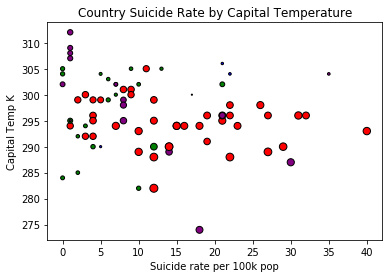

In [116]:
#Temp Chart
plt.scatter(suicide_rate,cap_temp, s=lats, edgecolors='black', c= colors)

plt.title("Country Suicide Rate by Capital Temperature")
plt.xlabel("Suicide rate per 100k pop")
plt.ylabel("Capital Temp K")
plt.plot(cap_temp, vc_fit, "b--", linewidth=1)

"""
plt.legend(loc="best")

legend1 = c.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
"""

Text(0, 0.5, 'Latitude')

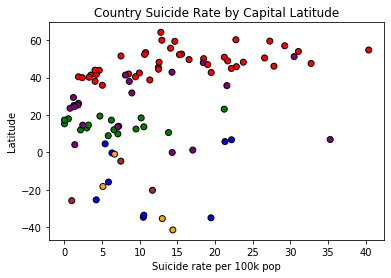

In [94]:
#Latitude Chart
plt.scatter(suicide_rate,lats, edgecolors='black', c= colors)

plt.title("Country Suicide Rate by Capital Latitude")
plt.xlabel("Suicide rate per 100k pop")
plt.ylabel("Latitude")


In [85]:
continents = dropped.groupby('ContinentName')

In [87]:
continents.mean()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),CapitalLatitude,CapitalLongitude
ContinentName,,,,,,,,
Africa,2003.417394,13.717196,1.243986e+06,6.710672,0.703260,7250.627303,-16.822222,47.050000
Asia,2003.050485,204.691681,1.545469e+06,10.825711,0.744658,17614.809100,25.463889,72.068519
Australia,2000.253788,59.696946,4.676214e+05,9.786227,0.833472,14961.266144,-23.895833,167.966666
Central America,2002.110417,91.314610,1.510835e+06,7.075824,0.697854,7581.456499,17.681250,-86.647917
Europe,2002.305877,166.727684,1.272088e+06,15.481484,0.807396,21487.512279,48.271138,16.516667
North America,1998.377257,16.711355,1.388642e+05,6.255601,0.736759,10559.232772,16.325758,-67.331818
South America,2000.123034,134.453568,2.401918e+06,11.749391,0.701501,4945.400496,-14.101852,-61.887037


In [128]:
data_by_continent = dropped.groupby(['ContinentName', 'country']).mean()


In [132]:
data_by_continent.to_csv(path_or_buf = '../data_by_continent.csv',sep='|')